En este caso vamos a darle un giro de tuerca a la forma en la que se ha resuelto los ejercicios de la Pair de hasta ahora! Para ello os vamos a pedir que por vuestra cuenta busqueis un dataset que os guste, por ejemplo de Kaggle o de donde queráis extraerlo. De esta forma vamos a estudiar los diferentes estadísiticos que contiene en dataset seleccionado Para todas los ejercicios de pair programming de Estadística I, II y III usaremos el dataframe que se tome para el desarrollo de este ejercicio de pair programming.

1. Buscar un conjunto de datos a analizar:  
Se recomienda que el conjunto de datos a analizar tenga variables numéricas y categóricas. Ya que también se analizarán.

In [13]:

import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#Descargmos los datos
df=pd.read_csv('instagram_global_top_1000.csv', index_col=0)
df.head(3)

,Rank,Account,Title,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg,Scraped
Country,,,,,,,,,,
All,1,cristiano,Cristiano Ronaldo,https://www.instagram.com/cristiano/,Sports with a ball,400100000.0,India,7800000.0,9500000.0,2022-02-07 16:50:24.798803
All,2,kyliejenner,Kylie 🤍,https://www.instagram.com/kyliejenner/,Fashion|Modeling|Beauty,308800000.0,United States,6200000.0,10100000.0,2022-02-07 16:50:24.798803
All,3,leomessi,Leo Messi,https://www.instagram.com/leomessi/,Sports with a ball|Family,306300000.0,Argentina,4800000.0,6500000.0,2022-02-07 16:50:24.798803


In [15]:
df.columns

Index(['Rank', 'Account', 'Title', 'Link', 'Category', 'Followers',
       'Audience Country', 'Authentic engagement', 'Engagement avg',
       'Scraped'],
      dtype='object')

In [16]:
#arreglamos columnas para trabajar mas facilmente
cambio_columnas = {col :  col.lower().strip().replace(' ','_') for col in df.columns}


In [17]:
df.rename(columns=cambio_columnas, inplace=True)

In [12]:
df.columns

Index(['rank', 'account', 'title', 'link', 'category', 'followers',
       'audience_country', 'authentic_engagement', 'engagement_avg',
       'scraped'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, All to All
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rank                  1000 non-null   int64  
 1   account               1000 non-null   object 
 2   title                 983 non-null    object 
 3   link                  1000 non-null   object 
 4   category              909 non-null    object 
 5   followers             1000 non-null   float64
 6   audience_country      993 non-null    object 
 7   authentic_engagement  1000 non-null   float64
 8   engagement_avg        1000 non-null   float64
 9   scraped               1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 85.9+ KB


In [15]:
df.shape

(1000, 10)

In [16]:
df.duplicated().sum()

0

In [17]:
df.isnull().sum()

rank                     0
account                  0
title                   17
link                     0
category                91
followers                0
audience_country         7
authentic_engagement     0
engagement_avg           0
scraped                  0
dtype: int64

In [18]:
df.describe()

,rank,followers,authentic_engagement,engagement_avg
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,500.500000,2.483610e+07,6.491228e+05,8.653886e+05
std,288.819436,3.872143e+07,1.098804e+06,1.267515e+06
min,1.000000,2.800000e+06,0.000000e+00,5.200000e+04
25%,250.750000,9.000000e+06,2.091000e+05,3.086000e+05
50%,500.500000,1.440000e+07,3.637000e+05,5.239000e+05
75%,750.250000,2.565000e+07,6.832500e+05,9.508000e+05
max,1000.000000,4.696000e+08,1.340000e+07,1.340000e+07


In [ ]:
df['category'].unique()

In [ ]:
df['audience_country'].value_counts()

KeyboardInterrupt: 

<Figure size 576x288 with 0 Axes>

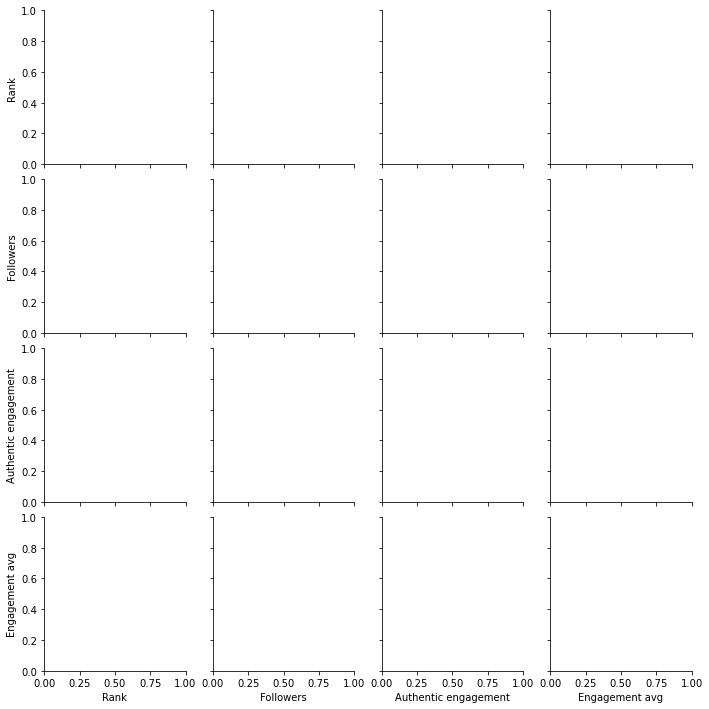

In [11]:
#Despues de hacernos una idea general de los datos que tenemos, sacamos graficas generales para ayudarnos a 
# entender los datos, que tarda media vida en cargarse...
plt.figure(figsize =(8,4))
sns.pairplot(data = df)
plt.show()

2. Extraer los siguentes estadísiticos del conjunto de datos para varias de las variables disponibles:

### Media


In [12]:
df['followers'].mean()

KeyError: 'followers'

In [ ]:
df['followers'].max()

469600000.0

In [ ]:
df['followers'].min()

2800000.0

### Desviación con respecto de la media

In [ ]:
media=df['followers'].mean()
diferencias=df['followers']-media
desviacion_media=np.abs(diferencias)
desviacion_media

,followers
Country,
All,375263900.0
All,283963900.0
All,281463900.0
All,192963900.0
All,270963900.0
...,...
All,17136100.0
All,13336100.0
All,14736100.0


### Varianza

In [ ]:
df['followers'].var()

1499349496286270.5

### Desviación típica

In [ ]:
df['followers'].std()

38721434.58455885

### Moda

In [ ]:
df['followers'].mode()

0    7800000.0
dtype: float64

### Mediana


In [ ]:
df['followers'].median()

14400000.0


### Media ponderada

In [ ]:
pesos=np.random.randint(0,100,df.shape[0])
average=np.average(df['followers'], weights=pesos)
average

24681026.459765192

### Robustez


### Coeficiente de variación

In [ ]:
coeficiente_variacion=df['followers'].mean()/df['followers'].std()
coeficiente_variacion


0.6414044383031207

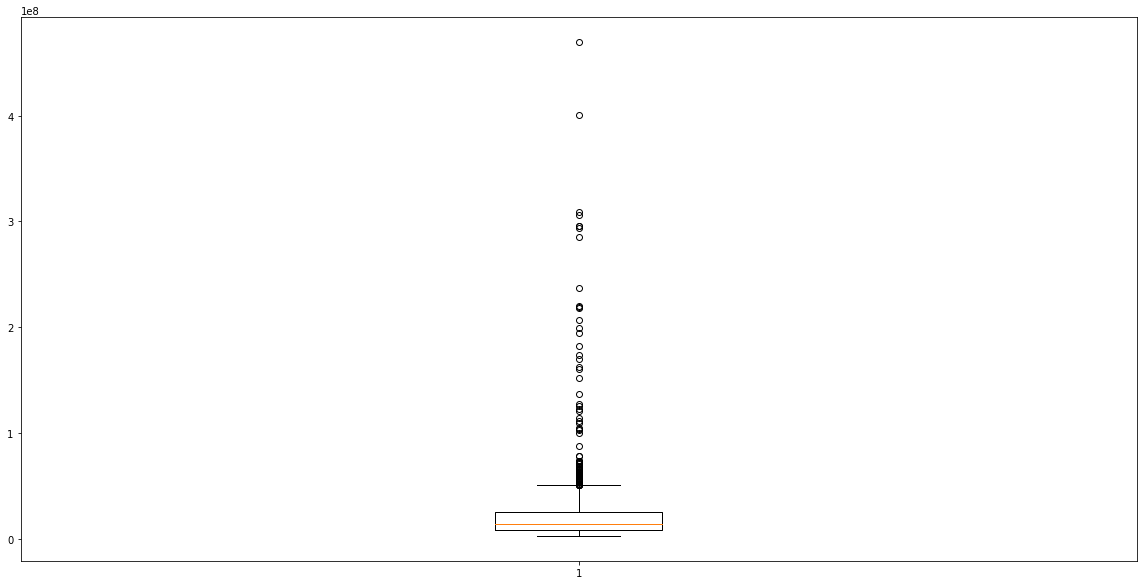

In [ ]:
fig=plt.figure(figsize=(20,10))
plt.boxplot(df['Followers'])
plt.show()

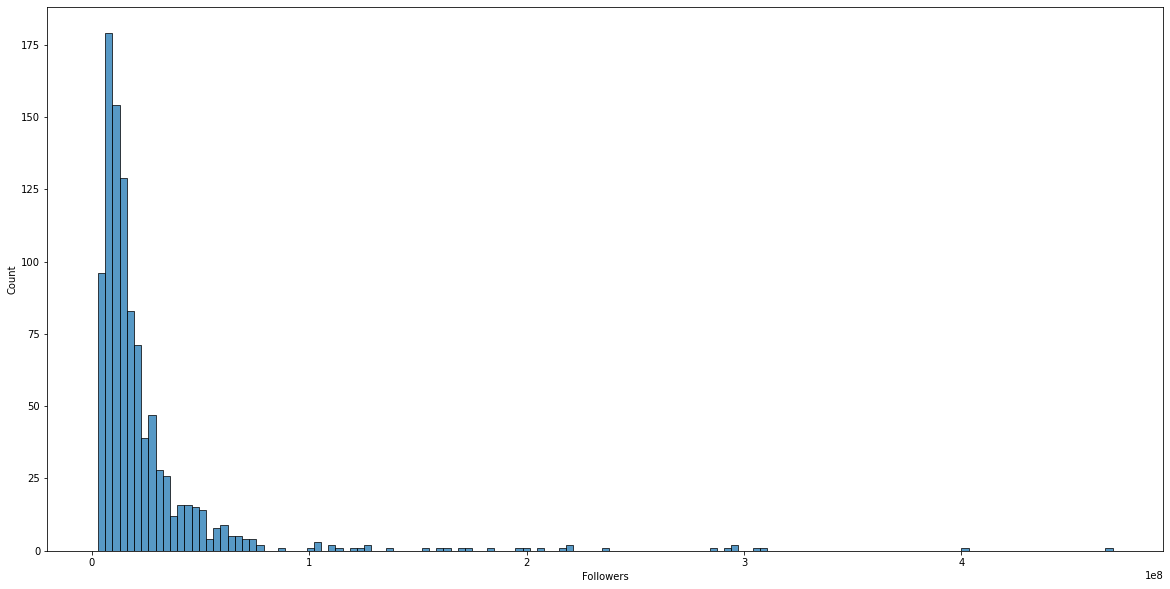

In [ ]:
fig=plt.figure(figsize=(8,4))
sns.histplot(df['Followers'])
plt.show()

3. Interpretación de los resultados.  
Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo hincapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.

- **df['followers']** Analizando los datos, encontramos una distribución muy desigual, la moda, mediana y se alejan de la media en mas de 10 millones de seguidores. Teniendo en cuenta los valores maximos y minimos, encontramos una diferencia entre ellos de más del valor de la media. La desviacion estándar es del %, lo que significa una gran dispersion de datos, tiene un valor de variacion mayor del número minimo de seguidores.

In [18]:
df.set_index(['rank'],inplace=True)
df.to_csv('instagram_global_top_1000.csv')